# Домашнее задание «Проблема качества данных»

#### Цель: 
применить на практике методы по оценке качества данных.
#### Описание задания:
В домашней работе необходимо провести очистку данных на примере датасета с информацией о пассажирах корабля Титаник. На полученных данных обучите модель классификации, с целевым признаком Survived (1 – пассажир выжил, 0 – погиб). Обучите модель на необработанных данных и посчитайте метрику качества. Проведите очистку данных. Обучите модель на данных после обработки, посчитайте метрику качества. Сравнить полученные результаты. Значение метрики должно улучшиться.

In [1197]:
import numpy as np
import pandas as pd

In [1198]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

## Этапы работы:

### 1. Получите и загрузите данные

In [1199]:
my_path = r
data = pd.read_csv(my_path)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1200]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Словарь с данными
| переменная | определение | значение |
| :--- | :---: | ---: |
| survival | Выживание	| 0 = No, 1 = Yes |
| pclass | Класс билета |	1 = 1st, 2 = 2nd, 3 = 3rd |
| sex |	Пол	| male / female|
| Age |	Возраст в годах	| (float64) |
| sibsp	| Количество братьев и сестер / супругов на борту Титаника | (int64) |
| parch	| Количество родителей / детей на борту Титаника | (int64) |	
| ticket | Номер билета	| (object) |
| fare | Пассажирский тариф	| (float64)|
| cabin | Номер каюты | (object) |	
| embarked | Порт отправки | C = Шербур, Q = Квинстаун, S = Саутгемптон|

### 2. Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества

In [1201]:
df = data[['Pclass', 'Age', 'Fare', 'Survived']]
df.head()

,Pclass,Age,Fare,Survived
0,3,22.0,7.2500,0
1,1,38.0,71.2833,1
2,3,26.0,7.9250,1
3,1,35.0,53.1000,1
4,3,35.0,8.0500,0


In [1202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      891 non-null    float64
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


Допустим, нас не интересуют пассажиры, возраст которых неизвестен или 0 

In [1203]:
df_filter = df.dropna()
df_filter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    714 non-null    int64  
 1   Age       714 non-null    float64
 2   Fare      714 non-null    float64
 3   Survived  714 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 27.9 KB


In [1204]:
X = df_filter[['Pclass', 'Age', 'Fare']]
y = df_filter[['Survived']]

In [1205]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Создание и обучение модели

In [1206]:
model = LogisticRegression().fit(X_train, y_train)
print('Weights: {}'.format(model.coef_))

pred_values = model.predict(X_test)
print('Error: {}'.format(mean_absolute_error(pred_values, y_test)))

Weights: [[-0.99649265 -0.03746545  0.0058911 ]]
Error: 0.3146853146853147


MAE ~ 0.3, это означает точность около 70%. Неплохой результат, но можно повысить

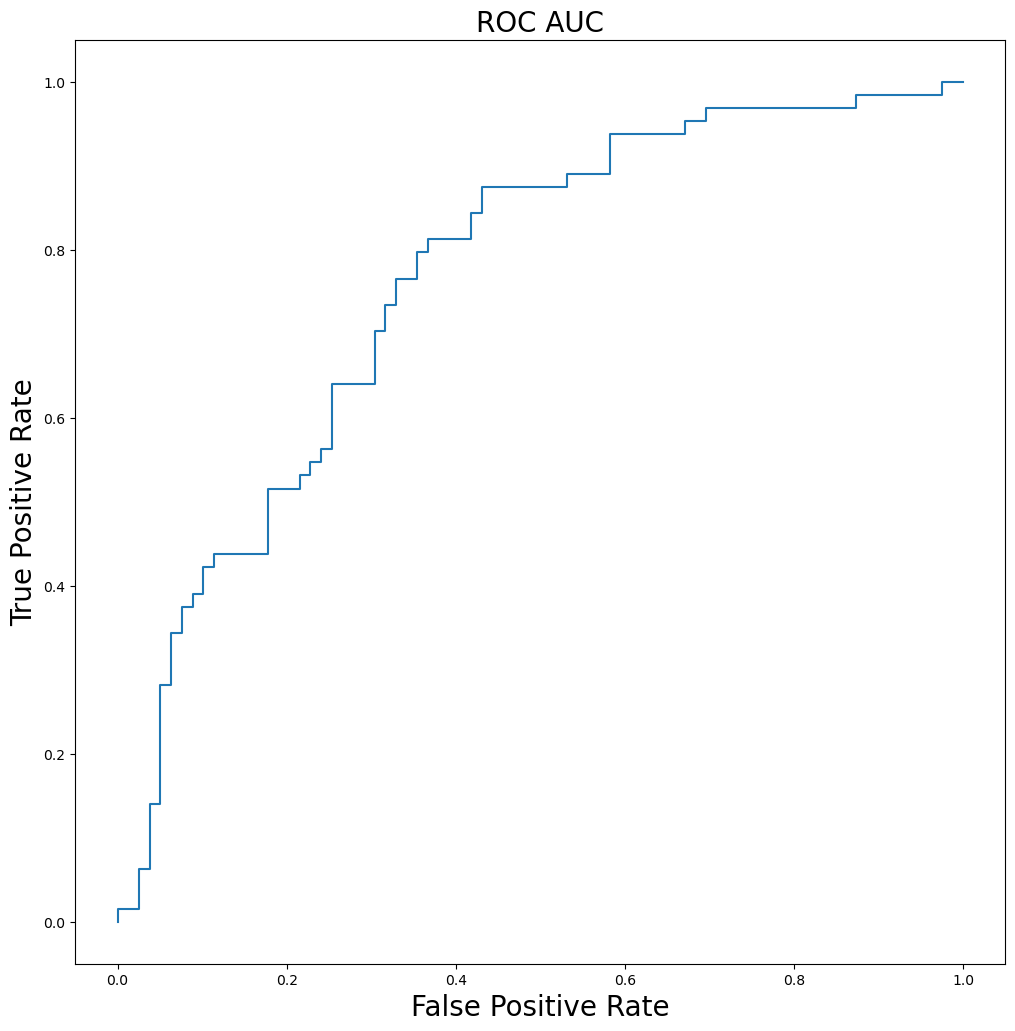

In [1207]:
predictions = model.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, predictions[:,1])
plt.figure(figsize=(12, 12))
plt.plot(fpr, tpr)
plt.title('ROC AUC', fontdict={'fontsize': 20})
plt.xlabel('False Positive Rate', fontdict={'fontsize': 20})
plt.ylabel('True Positive Rate', fontdict={'fontsize': 20})
plt.show()

### 3. Снова загрузите полные данные


In [1208]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 4. Удалите признаки, которые логически не нужны для построения модели
### Обоснуйте

При кораблекрушении спасали преимущественно женщин и детей, соответственно ключевыми признаками являются ***Sex*** и ***Age***, эвакуацию начинали с пассажиров первого класса, так что признак ***Pclass*** является значимым. 

Количество родственников вряд ли влияет, но это можно проверить. 

Пассажирский тариф (***Fare***) можно использовать только предварительно стандартизировав данные, поскольку значиния признака очень большие

Точно не существенны: имя, ID, порт отправки, номер билета и каюты

In [1209]:
new_df = data[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

In [1210]:
new_df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

### 5. Проверьте данные на наличие пропущенных значений

In [1211]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          714 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


#### a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски

In [1212]:
round(100 - new_df.dropna().shape[0] * 100 / new_df.shape[0], 2)

19.87

При простом удалении строк, в котором присутствуют пустые значения потеряется почти 20% данных

#### b) Заполните пропуски
- средним значением; 
- константой; 
- классом, указывающим на то, что значение было пропущено; 
- случайным числом. 

Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.


В нашем случае пропуски есть только в признаке ***Age***. Посмотрим на его распределение:

In [1213]:
new_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<AxesSubplot:ylabel='Frequency'>

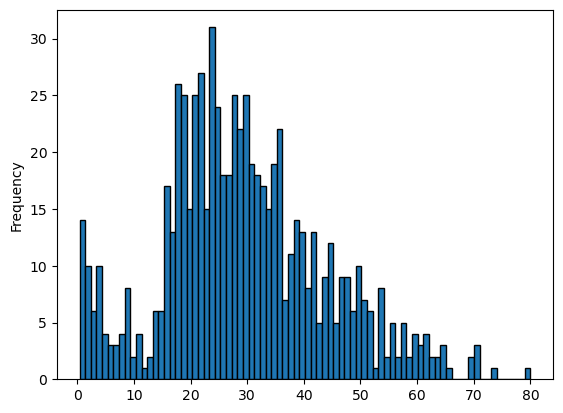

In [1214]:
#построить график распределения значений в столбце точек с использованием гистограммы
new_df['Age'].plot(kind= 'hist', bins=80, edgecolor ='black')

In [1215]:
med_age = int(new_df[data.Age.notnull()]['Age'].median())
med_age

28

<AxesSubplot:ylabel='Frequency'>

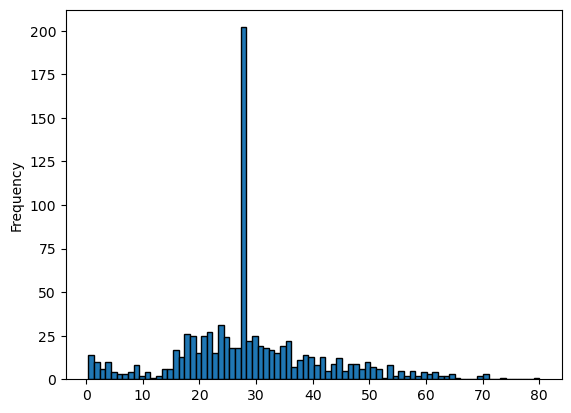

In [1216]:
import warnings
warnings.filterwarnings('ignore')

new_df.Age[data.Age.isnull()] = int(med_age)
new_df.Age.plot(kind= 'hist', bins=80, edgecolor ='black')

In [1217]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    object 
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


### 6. Категориальные переменные переведите в цифровые значения.

In [1218]:
new_df['Sex'] = new_df['Sex'].map({'male': 0, 'female': 1})
new_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,1,3,0,22.0,1,0,7.2500,0
1,2,1,1,38.0,1,0,71.2833,1
2,3,3,1,26.0,0,0,7.9250,1
3,4,1,1,35.0,1,0,53.1000,1
4,5,3,0,35.0,0,0,8.0500,0


### 7. Проверьте данные на наличие выбросов.
Удалите выбросы, если считаете это целесообразным. Обоснуйте.

В датафрейме ***new_df*** всего 7 признаков ('Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived'), из них 2 бинарные ('Sex', 'Survived'), в которых выбросы невозможны; признак 'Pclass' может принимать одно из трех значений (1, 2, 3), следователььно и здесь небудет выбросов. Проверим остальные:

<AxesSubplot:>

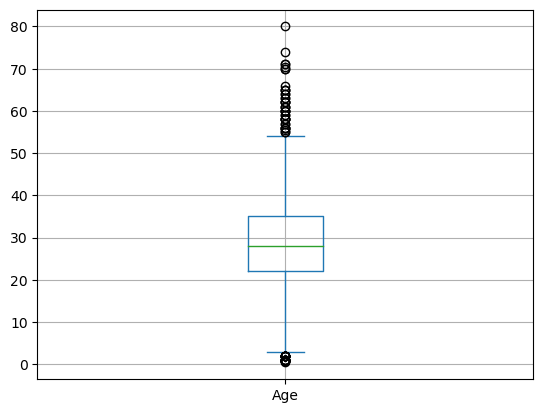

In [1219]:
new_df['Age'].plot(kind='box', grid=True)

In [1220]:
new_df['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

В признаке возраста определенно есть выбросы: люди, возраст которых от 0 до 4 лет и от 54 до 80. Проверим "общую выживаемость" этих людей

<AxesSubplot:ylabel='Frequency'>

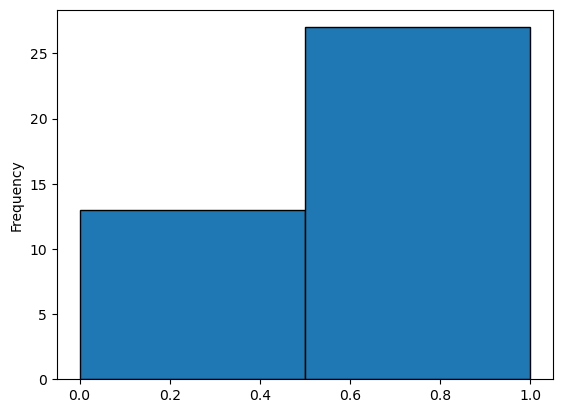

In [1221]:
y_df = new_df[new_df['Age'] <= 4]
y_df['Survived'].plot(kind= 'hist', bins=2, edgecolor ='black')

<AxesSubplot:ylabel='Frequency'>

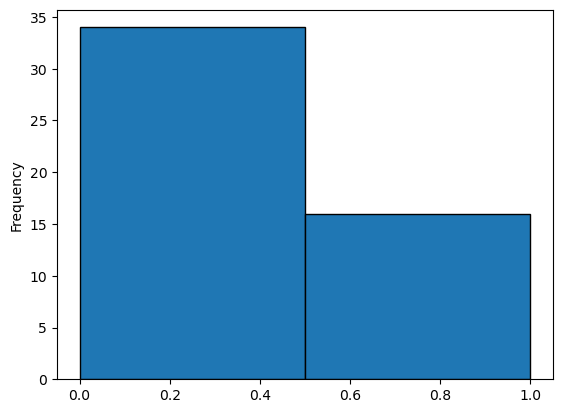

In [1222]:
o_df = new_df[new_df['Age'] >= 54]
o_df['Survived'].plot(kind= 'hist', bins=2, edgecolor ='black')

Возраст - важный признак, он сильно влияет на вероятность. Разобъем его по процентилям, отдельно выделив значения - выбросы

In [1223]:
new_df['Age'][data.Age <= 4.0] = '0-4'
new_df['Age'][(data.Age > 4.0) & (data.Age <= 22.0)] = '4-22'
new_df['Age'][(data.Age > 22.0) & (data.Age <= 28.0)] = '22-28'
new_df['Age'][(data.Age > 28.0) & (data.Age <= 35.0)] = '28-35'
new_df['Age'][(data.Age > 35.0) & (data.Age <= 54.0)] = '35-54'
new_df['Age'][data.Age > 54.0] = '54-80'

In [1224]:
df1 = pd.get_dummies(new_df['Age'])
new_df = pd.concat([new_df, df1], axis=1).reindex(new_df.index)
new_df.drop('Age', axis=1, inplace=True)
new_df 

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Survived,28.0,0-4,22-28,28-35,35-54,4-22,54-80
0,1,3,0,1,0,7.2500,0,0,0,0,0,0,1,0
1,2,1,1,1,0,71.2833,1,0,0,0,0,1,0,0
2,3,3,1,0,0,7.9250,1,0,0,1,0,0,0,0
3,4,1,1,1,0,53.1000,1,0,0,0,1,0,0,0
4,5,3,0,0,0,8.0500,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,0,0,0,13.0000,0,0,0,1,0,0,0,0
887,888,1,1,0,0,30.0000,1,0,0,0,0,0,1,0
888,889,3,1,1,2,23.4500,0,1,0,0,0,0,0,0
889,890,1,0,0,0,30.0000,1,0,0,1,0,0,0,0


In [1225]:
new_df = new_df[['PassengerId', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', 'Survived', '0-4', '4-22', '22-28', 28.0, '28-35', '35-54', '54-80']]
new_df = new_df.rename(columns={28.0: '28'}).reindex(new_df.index)
new_df

,PassengerId,Pclass,Sex,SibSp,Parch,Fare,Survived,0-4,4-22,22-28,28,28-35,35-54,54-80
0,1,3,0,1,0,7.2500,0,0,1,0,0,0,0,0
1,2,1,1,1,0,71.2833,1,0,0,0,0,0,1,0
2,3,3,1,0,0,7.9250,1,0,0,1,0,0,0,0
3,4,1,1,1,0,53.1000,1,0,0,0,0,1,0,0
4,5,3,0,0,0,8.0500,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,0,0,0,13.0000,0,0,0,1,0,0,0,0
887,888,1,1,0,0,30.0000,1,0,1,0,0,0,0,0
888,889,3,1,1,2,23.4500,0,0,0,0,1,0,0,0
889,890,1,0,0,0,30.0000,1,0,0,1,0,0,0,0


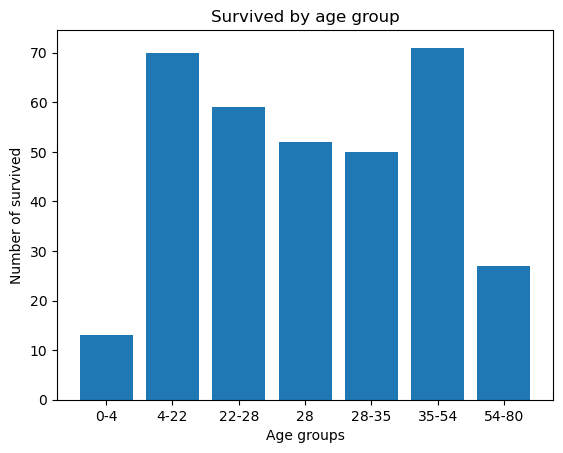

In [1226]:
age_groups = ['0-4', '4-22', '22-28', '28', '28-35', '35-54', '54-80']
survived_by_age = new_df.groupby(age_groups)['Survived'].sum()
plt.bar(age_groups, survived_by_age)
plt.xlabel('Age groups')
plt.ylabel('Number of survived')
plt.title('Survived by age group')
plt.show()

Судя по диаграмме, среди выживших мало людей ~30 лет

<AxesSubplot:ylabel='Frequency'>

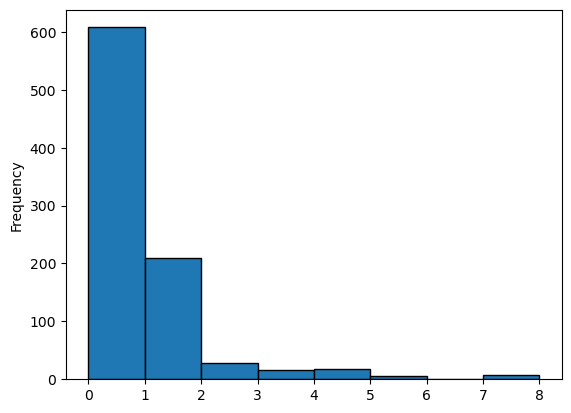

In [1227]:
new_df['SibSp'].plot(kind= 'hist', bins=8, edgecolor ='black')

<AxesSubplot:ylabel='Frequency'>

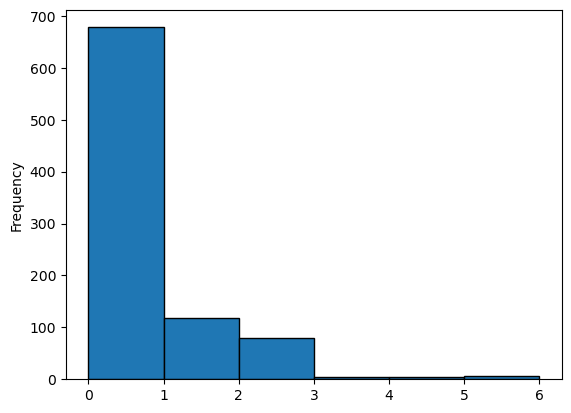

In [1228]:
new_df['Parch'].plot(kind= 'hist', bins=6, edgecolor ='black')

<AxesSubplot:title={'center':'Parch'}, xlabel='Parch'>

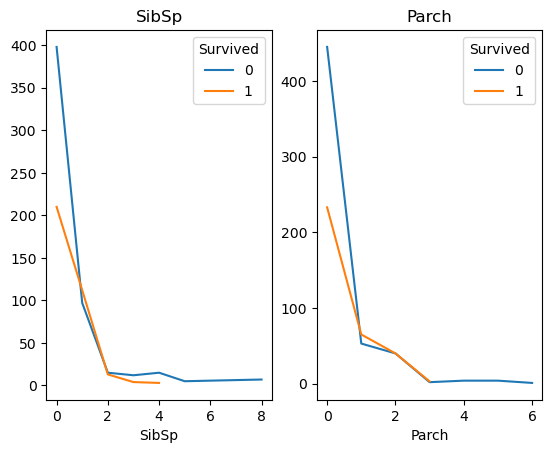

In [1229]:
fig, axes = plt.subplots(ncols=2)
new_df.pivot_table('PassengerId', ['SibSp'], 'Survived', 'count').plot(ax=axes[0], title='SibSp')
new_df.pivot_table('PassengerId', ['Parch'], 'Survived', 'count').plot(ax=axes[1], title='Parch')


Из гарафиуов следует, что количество родственников обратно пропорционально шансам на выживание

<AxesSubplot:ylabel='Frequency'>

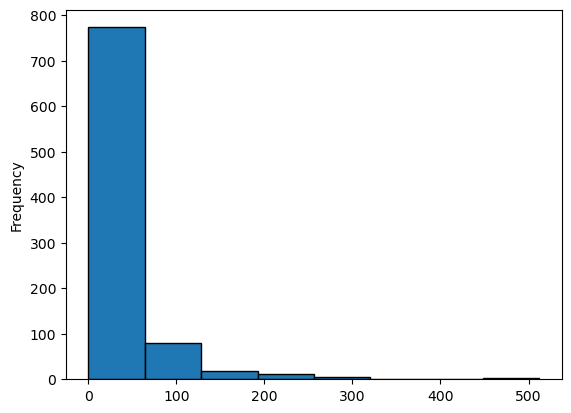

In [1230]:
new_df['Fare'].plot(kind= 'hist', bins=8, edgecolor ='black')

Последняя интересная метрика - Fare (Пассажирский тариф)

<AxesSubplot:>

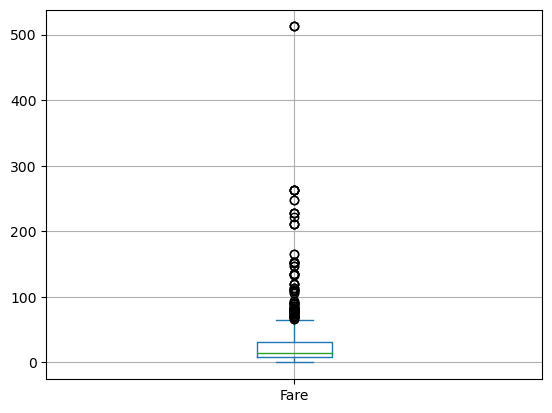

In [1231]:
new_df['Fare'].plot(kind='box', grid=True)

In [1232]:
new_df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

Здесь присутствуют явные выбросы. Лучше будет удалить строки, в которых тариф превышает значение 140

In [1233]:
new_df = new_df[new_df['Fare'] <= 140]
new_df['Fare'].describe()

count    860.000000
mean      24.905135
std       25.743930
min        0.000000
25%        7.895800
50%       13.500000
75%       29.125000
max      135.633300
Name: Fare, dtype: float64

Удалено всего 31 строка, но график стал значительно лучше

<AxesSubplot:>

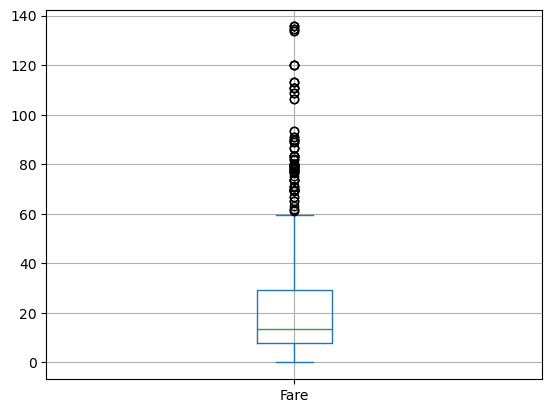

In [1234]:
new_df['Fare'].plot(kind='box', grid=True)

<AxesSubplot:title={'center':'Fare'}, xlabel='Fare'>

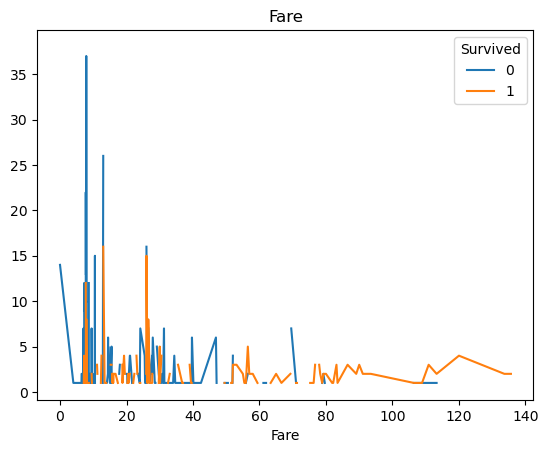

In [1235]:
new_df.pivot_table('PassengerId', ['Fare'], 'Survived', 'count').plot(title='Fare')


Признак Fare очень большой, относительно остальных. Следуем выполнить масштабирование

In [1236]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
new_df['Fare'] = scaler.fit_transform(new_df[['Fare']])

### 8.Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.

In [1237]:
X = new_df[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare', '0-4', '4-22', '22-28', '28', '28-35', '35-54', '54-80']]
y = new_df[['Survived']]


In [1238]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [1239]:
model = LogisticRegression().fit(X_train, y_train)
print('Weights: {}'.format(model.coef_))

pred_values = model.predict(X_test)
print('Error: {}'.format(mean_absolute_error(pred_values, y_test)))

Weights: [[-0.93263586  2.71630997 -0.39637337 -0.094637    1.03646982  2.05267098
  -0.02683042 -0.04007003 -0.23571125  0.18930513 -0.54774775 -1.39164952]]
Error: 0.19186046511627908


MAE ~ 0.2, точность прогноза выросла на 10 %

In [1240]:
# from sklearn.ensemble import IsolationForest

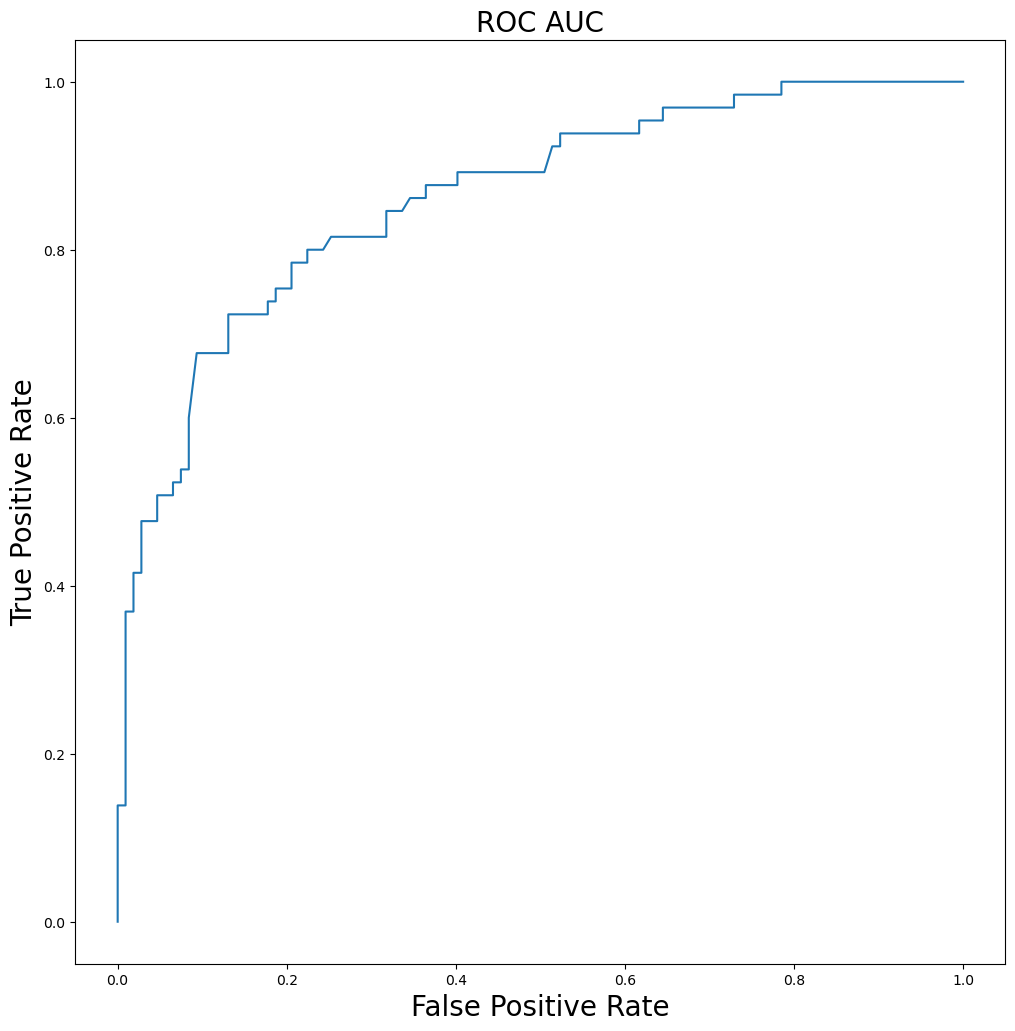

In [1241]:
predictions = model.predict_proba(X_test)
fpr, tpr, thresh = roc_curve(y_test, predictions[:, 1])
plt.figure(figsize=(12, 12))
plt.plot(fpr, tpr)
plt.title('ROC AUC', fontdict={'fontsize': 20})
plt.xlabel('False Positive Rate', fontdict={'fontsize': 20})
plt.ylabel('True Positive Rate', fontdict={'fontsize': 20})
plt.show()

### 9. Сформулируйте выводы по проделанной работе.

В ходе работы были построены две модели. Первая основывалась только на трех численных параметрах с удаленными пропусками. Вторая - содержала в себе 5 признаков, включая категориальные значения, пропуски были заполнены средними значениями столбца. 

Разница точности двух можелей 10 % в пользу второй. Более сложная и более полная модель быстрее обучается, что демонстрирует ROC-кривая. Стандартизация и преобразование категориальных признаков сильно влияют на качество модели. 

Я считаю, что при работе с данными необходима качественная предобработка перед непосредственно построением модели. Это позволит повысить качество прогнозов.

***rubbish in, rubbish out - что положишь, то получишь***